In [25]:
# dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
%matplotlib inline

In [26]:
import pandas as pd
import psycopg2
import config as creds

In [27]:
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
    
print(conn_string)

host=aws-pg-db001.chpuoe9ndogr.us-east-1.rds.amazonaws.com port=5432 dbname=covid user=postgres password=awsdbpassword001


In [28]:
conn = psycopg2.connect(conn_string)
# print("Connected!")

In [29]:
covid_df = pd.read_sql_query(
                   ''' SELECT * FROM coviddata 
                   ''' , conn)

In [30]:
covid_df

,id,country,province_state,studypopsize,covidtestresult,meanage,agegroup_pediatrics,agegroup_youngadult,agegroup_aging,gender_male,...,diarrhea,nauseavomiting,anorexia,sorethroat_congestion,chills,chestpain,losssmelltaste,asymptomatic,mortality,mortality_bin
0,1 ...,China ...,Wuhan ...,191 ...,Positive only ...,56 ...,0 ...,0 ...,0 ...,1 ...,...,0.05 ...,0.04 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0.28 ...,1 ...
1,1 ...,China ...,Wuhan ...,54 ...,Positive only ...,69 ...,0 ...,0 ...,1 ...,1 ...,...,0.04 ...,0.06 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0 ...,1 ...,1 ...
2,1 ...,China ...,Wuhan ...,137 ...,Positive only ...,52 ...,0 ...,0 ...,0 ...,1 ...,...,0.05 ...,0.03 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0 ...
3,2 ...,China ...,Wuhan ...,199 ...,Positive only ...,58 ...,0 ...,0 ...,0 ...,1 ...,...,0.02 ...,0.04 ...,0.01 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0.16 ...,1 ...
4,2 ...,China ...,Wuhan ...,99 ...,Positive only ...,59 ...,0 ...,0 ...,0 ...,1 ...,...,0.04 ...,0.09 ...,0.02 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0.15 ...,1 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,199 ...,China ...,Hubei ...,78 ...,Positive only ...,64 ...,0 ...,0 ...,0 ...,1 ...,...,0.03 ...,0.03 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0.13 ...,1 ...
1152,200 ...,USA ...,New York ...,151 ...,Positive only ...,56 ...,0 ...,0 ...,0 ...,1 ...,...,0.2 ...,0.09 ...,0 ...,0.11 ...,0.15 ...,0 ...,0 ...,0 ...,0.15 ...,1 ...
1153,200 ...,USA ...,New York ...,618 ...,Positive only ...,63 ...,0 ...,0 ...,0 ...,0 ...,...,0.25 ...,0.22 ...,0 ...,0.08 ...,0.19 ...,0 ...,0 ...,0 ...,0.13 ...,1 ...
1154,200 ...,USA ...,New York ...,231 ...,Positive only ...,62 ...,0 ...,0 ...,0 ...,1 ...,...,0.21 ...,0.1 ...,0 ...,0.08 ...,0.16 ...,0 ...,0 ...,0 ...,0.31 ...,1 ...


In [31]:
df = pd.read_csv('test3.csv')


Question 1: Is Age a factor in determining high risk mortality? 

In [32]:
age_plot = df[['Mean Age','Mortality','Mortality_bin']]
age_plot

,Mean Age,Mortality,Mortality_bin
0,56,0.28,1
1,69,1.00,1
2,52,0.00,0
3,58,0.16,1
4,59,0.15,1
...,...,...,...
1151,64,0.13,1
1152,56,0.15,1
1153,63,0.13,1
1154,62,0.31,1


In [33]:
X = age_plot[["Mean Age"]]
y = age_plot[["Mortality"]]
print(X.shape, y.shape)

(1156, 1) (1156, 1)


Text(0.5, 1.0, 'Age vs Mortality')

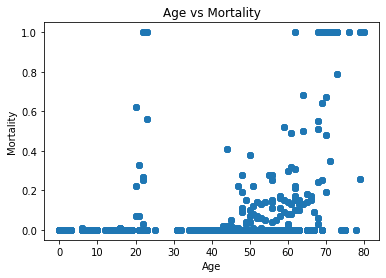

In [34]:
# Comment about this plot and how 20s have high mortality 
plt.scatter(X,age_plot[["Mortality"]])
plt.xlabel('Age')
plt.ylabel('Mortality')
plt.title('Age vs Mortality')

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [37]:
kmeans.fit(X_test, y_test)

KMeans(n_clusters=6)

In [38]:
predicted_clusters = kmeans.predict(X_test)

In [39]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_


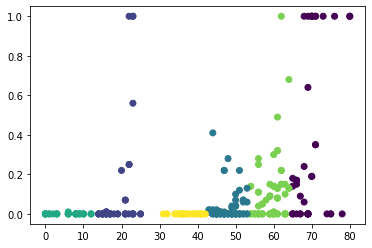

In [40]:
plt.scatter(X_test, y_test, c = labels, cmap='viridis')

In [41]:
X_test, predicted_clusters, y_test

(      Mean Age
 972         23
 202         16
 661         63
 1049        56
 953         70
 ...        ...
 325         46
 386         35
 329         35
 1126        61
 59           0
 
 [289 rows x 1 columns],
 array([1, 1, 4, 4, 0, 1, 0, 5, 2, 4, 2, 2, 1, 1, 2, 3, 2, 1, 3, 2, 0, 0,
        2, 1, 4, 1, 3, 0, 1, 5, 3, 5, 4, 5, 4, 2, 2, 3, 0, 5, 4, 0, 2, 4,
        2, 2, 4, 0, 1, 0, 1, 4, 0, 4, 2, 2, 2, 1, 3, 2, 2, 0, 4, 4, 1, 2,
        1, 4, 2, 2, 2, 5, 1, 5, 2, 4, 0, 5, 5, 2, 2, 1, 0, 2, 4, 0, 4, 4,
        4, 4, 1, 2, 5, 3, 0, 1, 2, 4, 1, 4, 1, 0, 2, 1, 0, 4, 4, 0, 2, 4,
        1, 4, 1, 3, 2, 4, 4, 1, 2, 0, 0, 4, 4, 1, 4, 4, 2, 0, 3, 2, 2, 2,
        2, 0, 5, 4, 5, 2, 2, 5, 3, 4, 4, 4, 5, 4, 4, 0, 2, 4, 4, 1, 0, 1,
        0, 1, 4, 2, 1, 3, 4, 4, 4, 2, 0, 2, 5, 2, 5, 1, 0, 0, 5, 3, 2, 0,
        0, 4, 3, 2, 1, 2, 2, 0, 5, 3, 0, 3, 3, 1, 1, 2, 4, 4, 0, 4, 2, 3,
        3, 1, 5, 4, 2, 5, 3, 3, 2, 2, 1, 5, 4, 2, 0, 3, 4, 4, 2, 2, 2, 4,
        0, 2, 5, 4, 5, 2, 2, 0, 1, 1, 0, 

In [42]:
risk_age = pd.DataFrame(X_test)

In [43]:
risk_age.reset_index(drop=True, inplace=True)

In [44]:
predicted_clusters =pd.DataFrame(predicted_clusters)
predicted_clusters

,0
0,1
1,1
2,4
3,4
4,0
...,...
284,2
285,5
286,5
287,4


In [45]:
risk_age['predicted_clusters']=predicted_clusters


In [46]:
y_test.reset_index(drop=True, inplace=True)

In [51]:
y_test

,Mortality
0,0.00
1,0.01
2,0.00
3,0.00
4,1.00
...,...
284,0.01
285,0.00
286,0.00
287,0.08


In [52]:
risk_age['Mortality']= y_test

In [56]:
riskAge = risk_age

In [55]:
# riskAge = risk_age.drop(['y_test'], axis=1)

In [57]:
riskAge.sort_values(by=['predicted_clusters'])

,Mean Age,predicted_clusters,Mortality
194,75,0,0.00
94,70,0,1.00
120,69,0,0.64
164,73,0,1.00
268,69,0,0.00
...,...,...,...
134,40,5,0.00
251,35,5,0.00
209,42,5,0.00
31,37,5,0.00


In [58]:
mort = riskAge.groupby(by=["predicted_clusters"]).mean('Mortality')
new_mort = mort.rename(columns={'Mortality':'AvgMortality'})

In [59]:
minimum = riskAge.groupby(by=["predicted_clusters"]).min('Mean Age')
new_min = minimum.rename(columns={'Mean Age':'MinAge'})

In [60]:
maximum = riskAge.groupby(by=["predicted_clusters"]).max('Mean Age')
new_max = maximum.rename(columns={'Mean Age':'MaxAge'})

In [ ]:
# Group 0 age 54-64 with mortality of 0.100147
# Group 1 age 12-25 with mortality of 0.094681
# Group 2 

In [61]:
combined=pd.concat([new_mort, new_min, new_max],axis=1)
combined

,Mean Age,AvgMortality,MinAge,Mortality,MaxAge,Mortality
predicted_clusters,,,,,,
0,69.674419,0.350930,65,0.0,80,1.00
1,18.822222,0.098889,14,0.0,25,1.00
2,47.824324,0.032703,43,0.0,53,0.41
3,5.533333,0.000333,0,0.0,12,0.01
4,59.308824,0.100147,54,0.0,64,1.00
5,37.758621,0.000000,31,0.0,42,0.00


In [62]:
results = combined[['AvgMortality','MinAge','MaxAge']]
results
# tableau visual? export as file 

,AvgMortality,MinAge,MaxAge
predicted_clusters,,,
0,0.350930,65,80
1,0.098889,14,25
2,0.032703,43,53
3,0.000333,0,12
4,0.100147,54,64
5,0.000000,31,42


In [ ]:
# end of question 1 

In [63]:
results.sort_values(by=['AvgMortality']) #vaccine recommendations? Why ages 12-25 higher mortality? 
# possible mental illness and also socializing via covid parties etc... 

,AvgMortality,MinAge,MaxAge
predicted_clusters,,,
5,0.000000,31,42
3,0.000333,0,12
2,0.032703,43,53
1,0.098889,14,25
4,0.100147,54,64
0,0.350930,65,80


In [ ]:
predicted_clusters = kmeans.predict(X)
predicted_clusters

In [ ]:
plt.scatter(X,predicted_clusters)
plt.xlabel('Age')
plt.ylabel('Cluster')

In [ ]:
[predicted_clusters, y]
plt.scatter(predicted_clusters, y)
#clusters 0, 1, 4 have high mortality risk 
#so if user inputs age in cluster 0,1,4 
# then, output will be high risk 

In [ ]:
pandas.DataFrame

In [ ]:
y_test

In [ ]:
cluster_df = pd.DataFrame(X_test['Mean Age'])


In [ ]:
cluster_df['labels']= labels


In [ ]:
cluster_df['Mortality']= y_test
cluster_df

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=500)
classifier

In [ ]:
labels=labels.reshape(-1,1)
labels.shape

In [ ]:
cluster_df['Mortality']

In [ ]:
mortality_bin=[]
for i in cluster_df['Mortality']:
    if i>0.123: #using mean as value to discriminate between mortality of 1 or 0 
        mortality_bin.append(1)
    else:
        mortality_bin.append(0)
cluster_df['Mortality_bin']=mortality_bin

In [ ]:
cluster_df


In [ ]:
classifier.fit(labels, cluster_df['Mortality_bin'])

In [ ]:
new_data = [1,0]
predictions = classifier.predict(new_data)

In [ ]:
# columns = ['Unnamed: 0', "ID","Country","Province/State", "Study Pop Size (N)",
# "Positive/negative cases", "AgeGroup_pediatrics", "AgeGroup_youngAdult",
# "AgeGroup_aging",'Mortality_bin']
# df = df.drop(columns=columns)


In [ ]:
# columns = ['White or European', "African American","Asian","Hispanic or Latino", "Multiple ethnicities or other"]
# df = df.drop(columns=columns)


In [ ]:
X = df.drop("Mortality", axis=1)
y = df["Mortality"]
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [ ]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

model = Sequential()

In [ ]:
number_inputs = 29
number_hidden_nodes = 50
hidden_layer = Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs) 
model.add(hidden_layer)

In [ ]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])


In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)


In [ ]:
# model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


In [ ]:
# grabbing all columns 
my_list = df.columns.values.tolist()
my_list;

In [ ]:
# How to use labels for classification? 

Machine Learning


In [ ]:
age = df[['AgeGroup_pediatrics','AgeGroup_youngAdult','AgeGroup_aging','Mortality_bin']]
age

In [ ]:
X = age[['AgeGroup_pediatrics','AgeGroup_youngAdult','AgeGroup_aging']]
y= age['Mortality_bin']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
target = age["Mortality_bin"]
target_names = ["no risk", "risk"]

data = age.drop("Mortality_bin", axis=1)
feature_names = data.columns


In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

In [ ]:
new_age_data = [[0, 1, 0]]
predicted_class = knn.predict(new_age_data)
print(predicted_class)

In [ ]:
#Fitting to Decision Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
#Fitting to Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
#Decision Tree and Random Forest gives same score 

In [ ]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [ ]:
# KNN- use later to figure out user input 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()



In [ ]:
X=iris.data

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=2 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
